In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bootcampviztools as booty


In [3]:
titanicDF = pd.read_csv("./data/titanic.csv")

In [6]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [9]:
titanicDF.drop(columns='deck', inplace=True)

In [11]:
es_woman = titanicDF.who == 'woman'
es_child = titanicDF.who == 'child'
es_man = titanicDF.who == 'man'

media_woman = titanicDF.loc[es_woman, 'age'].mean()
media_child = titanicDF.loc[es_child, 'age'].mean()
media_man = titanicDF.loc[es_man, 'age'].mean()

es_age_nulo = titanicDF.age.isna()

titanicDF.loc[es_woman & es_age_nulo, 'age'] = media_woman
titanicDF.loc[es_child & es_age_nulo, 'age'] = media_child
titanicDF.loc[es_man & es_age_nulo, 'age'] = media_man

In [12]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


In [18]:
titanicDF.dropna(inplace=True)

In [20]:
titanicDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [26]:
absolute_count = titanicDF['alive'].value_counts()
rel_count = titanicDF['alive'].value_counts(normalize=True)

(0.0, 100.0)

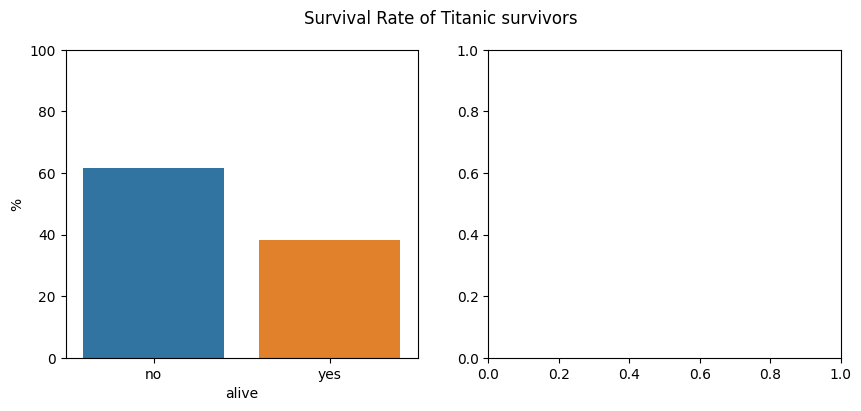

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Survival Rate of Titanic survivors")

percentage_values = titanicDF.alive.value_counts(normalize = True) * 100
sns.barplot(x = percentage_values.index, y = percentage_values.values, hue = percentage_values.index, ax = axs[0])
axs[0].set_ylabel("%")
axs[0].set_ylim(0,100)

In [31]:
data

alive
no     61.754781
yes    38.245219
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage of passengers that survived Titanic')

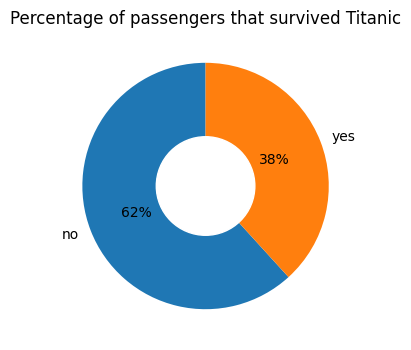

In [36]:
data = titanicDF.alive.value_counts(normalize=True)*100

fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.pie(data.values,
       labels=data.index,
       autopct='%.f%%',
       startangle=90,
       ax = axs[1])

my_circle = plt.Circle( (0,0),
                       0.4,
                       color='white')

axes[1].add_artist(my_circle)
axes[1].set_title("Percentage of passengers that survived Titanic")

2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  

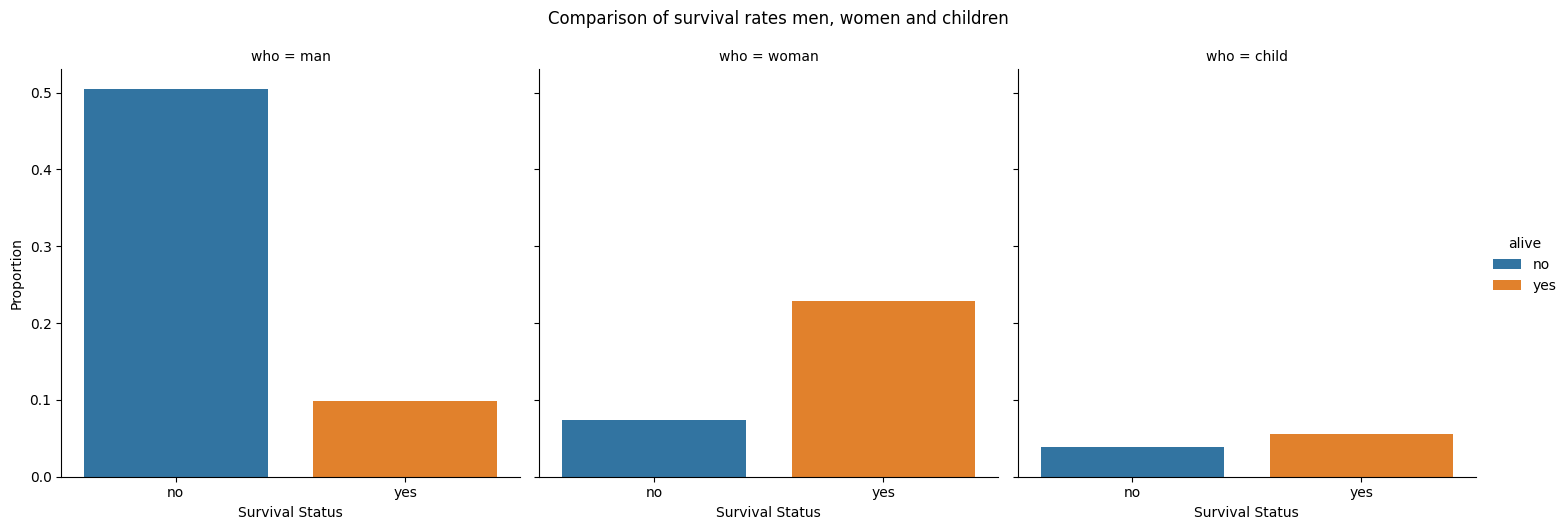

In [58]:
catplot = sns.catplot(x='alive',
                        col='who',
                        hue='alive',
                        data=titanicDF,
                        kind='count',
                        legend=True,
                        stat='proportion'
                        )
catplot.figure.suptitle('Comparison of survival rates men, women and children', y=1.05)
catplot.set_axis_labels('Survival Status', 'Proportion')

plt.show()

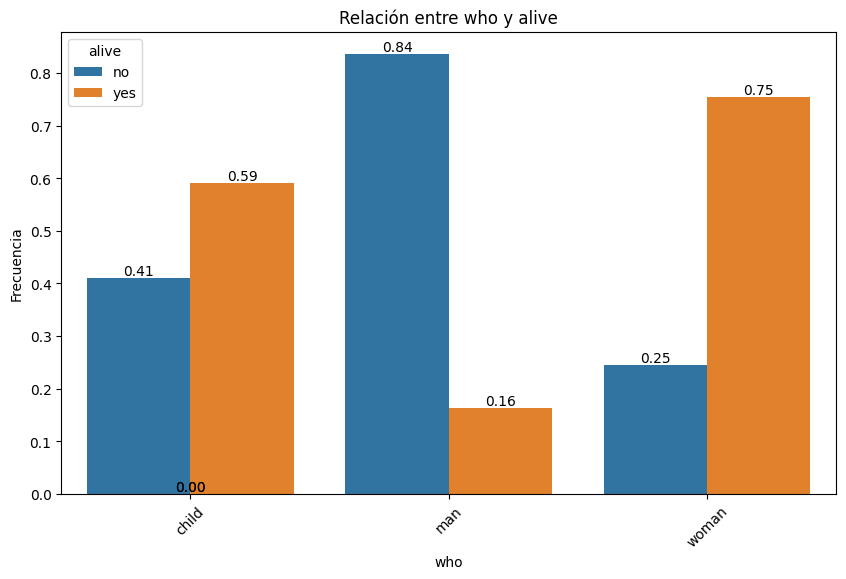

In [60]:
booty.plot_categorical_relationship_fin(titanicDF, 'who', 'alive', relative_freq=True, show_values=True)

In [62]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 92.0+ KB


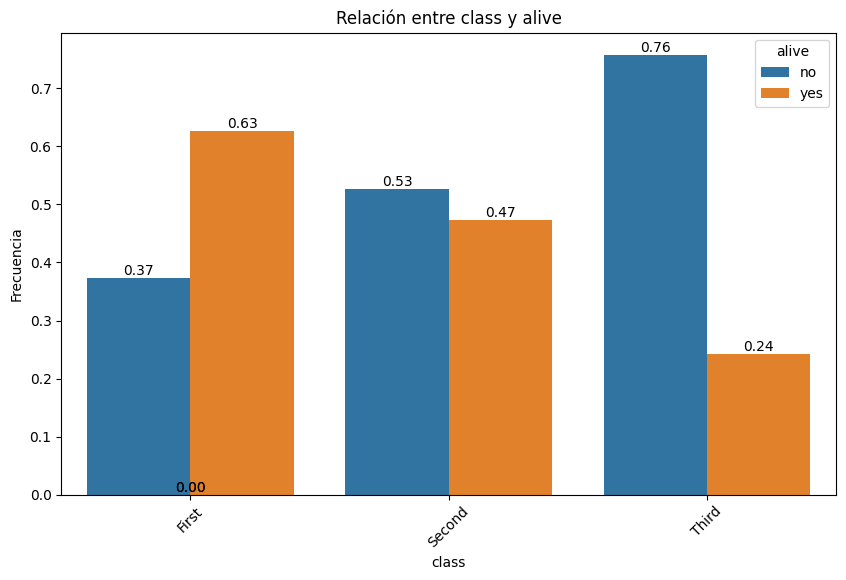

In [64]:
booty.plot_categorical_relationship_fin(titanicDF, 'class', 'alive',show_values=True, relative_freq=True)

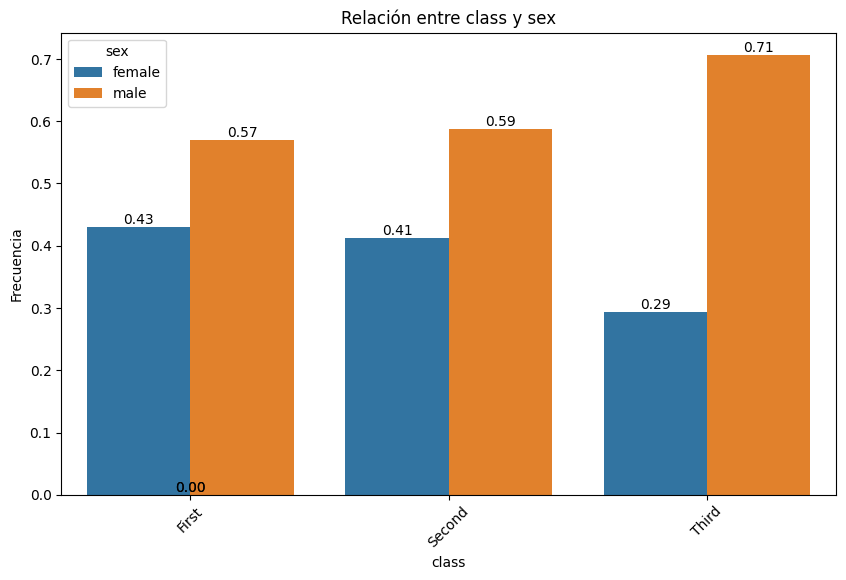

In [66]:
booty.plot_categorical_relationship_fin(titanicDF, 'class', 'sex',show_values=True, relative_freq=True)

In [70]:
woman_child = titanicDF[(titanicDF['who'] == 'child') | (titanicDF['who'] == 'woman')]

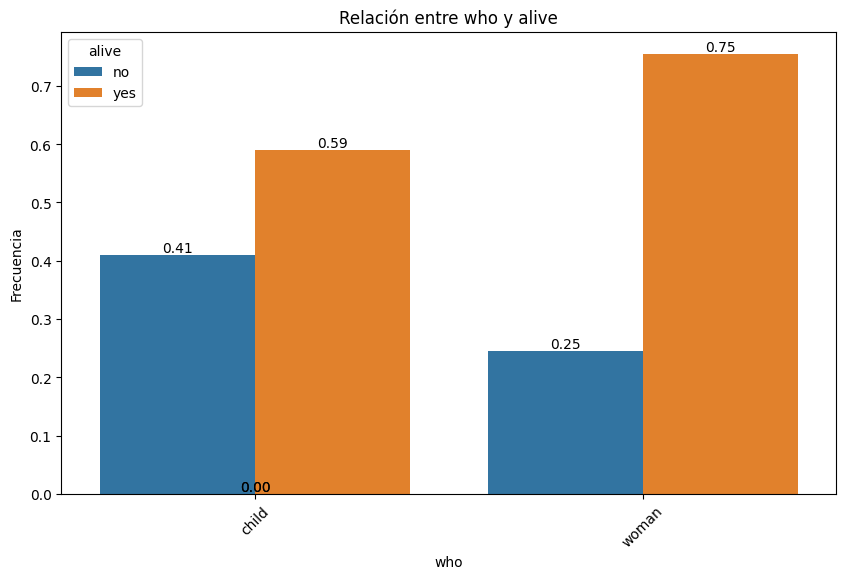

In [71]:
booty.plot_categorical_relationship_fin(woman_child, 'who', 'alive',show_values=True, relative_freq=True)